In [1]:
import numpy as np
import scipy.stats as stats 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
class radius_gen(stats.rv_continuous):
    def _cdf(self, r):
        return (r**2 - 1)/0.5
radius = radius_gen(a=1, b =np.sqrt(1.5), name='radius')

In [3]:
def generate_ring(N, plot=True):
    
    r = radius.rvs(size=N)
    phi = stats.uniform.rvs(loc=0, scale=2*np.pi, size=N)
    
    X = r * np.cos(phi)
    Y = r * np.sin(phi)
    
    C1 = plt.Circle((0, 0), 1, fill=False)
    C2 = plt.Circle((0, 0), np.sqrt(1.5), fill=False)
    
    if plot:
        fig,ax = plt.subplots(figsize=(10,10))

        ax.add_artist(C1)
        ax.add_artist(C2)

        ax.scatter(X, Y, s=0.4)
        ax.set_xlim(-np.sqrt(1.5), np.sqrt(1.5))
        ax.set_ylim(-np.sqrt(1.5), np.sqrt(1.5))


        plt.show()
    
    return X, Y

In [20]:
def generate_square(N, plot=True):
    r1 = stats.uniform.rvs(0, 1, size=N)
    X = (np.sqrt(1 + 8*r1) - 1)/2
    
    r2 = stats.uniform.rvs(0, 1, size=N)
    Y = -X + np.sqrt(X**2 + 2*X*r2 + r2)
    
    if plot:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.scatter(X, Y)
        ax.set_xlabel('X value')
        ax.set_ylabel('Y value')
        plt.show()
        
    return X, Y

In [5]:
def generate_rhombus(N, plot=True):
    #Генерируем точки в квадрате равномерно
    
    x = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=N)
    y = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=N)
    
    #Упаковываем парами 
    points = list(map(list, zip(x, y)))
    
    #Если встречается точка внутри маленького квадрата, перегенирируем пока не станет вне
    for elem in points:
        while (np.abs(elem[0]) < np.sqrt(2)/2) & (np.abs(elem[1]) < np.sqrt(2)/2):
            elem[0] = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=1)
            elem[1] = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=1)
    points = np.array(points)
    
    x1 = points[:,0]
    y1 = points[:,1]
    
    #Умножаем на матрицу поворота на 45 градусов
                          
    x2 = (((2)**(0.5))/2)*x1 + (((2)**(0.5))/2)*y1
    y2 = -(((2)**(0.5))/2)*x1 + (((2)**(0.5))/2)*y1
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    #Для вспомогательных прямых 
    if plot:                      
        dom1b = np.linspace(-1.5, 0, 2)
        dom1s = np.linspace(-1, 0, 2)
        dom2b = np.linspace(0, 1.5, 2)
        dom2s = np.linspace(0, 1, 2)

        #Нарисуем границы двух ромбиков красным:

        ax.plot(dom1b, dom1b + 1.5, 'r')
        ax.plot(dom1s, dom1s + 1, 'r')
        ax.plot(dom1b, -dom1b - 1.5, 'r')
        ax.plot(dom1s, -dom1s - 1, 'r')
        ax.plot(dom2b, 1.5 - dom2b, 'r')
        ax.plot(dom2s, 1 - dom2s, 'r')
        ax.plot(dom2s, dom2s - 1, 'r')
        ax.plot(dom2b, dom2b - 1.5, 'r')


        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)

        #Добавим все точки выборки 

        ax.scatter(x2, y2, s=1)

        #по желанию оси в центр 

        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.set_yticks([-2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2])

        plt.show()
    
    return x2, y2

In [36]:
def table(N, plot=True):
    pd.set_option('max_colwidth', 120)
    pd.set_option('display.width', 500)
    df = pd.DataFrame(columns=['Distrib', 'Kendall', 'Spearman', 'Pearson'])
    
    X, Y = generate_ring(N, plot)
    
    t = pd.DataFrame({'Distrib':['$(x, y) : 1 <= x^2 + y^2 <= 1.5$'], 'Kendall': [stats.kendalltau(X, Y)[1]],
                      'Spearman': [stats.spearmanr(X, Y)[1]], 'Pearson': [stats.pearsonr(X, Y)[1]]})
    
    df = pd.concat([df, t])
    
    X, Y = generate_square(N, plot)
    
    t = pd.DataFrame({'Distrib':['$C(x + y) * I(x, y \in [0, 1])$'], 'Kendall': [stats.kendalltau(X, Y)[1]],
                      'Spearman': [stats.spearmanr(X, Y)[1]], 'Pearson': [stats.pearsonr(X, Y)[1]]})
    
    df = pd.concat([df, t])
    
    X, Y = generate_rhombus(N, plot)
    
    t = pd.DataFrame({'Distrib':['$(x, y) : 1 ≤ |x| + |y| ≤ 1.5$'], 'Kendall': [stats.kendalltau(X, Y)[1]],
                      'Spearman': [stats.spearmanr(X, Y)[1]], 'Pearson': [stats.pearsonr(X, Y)[1]]})
    
    df = pd.concat([df, t])
    df.set_index('Distrib', inplace=True)
    
    return df

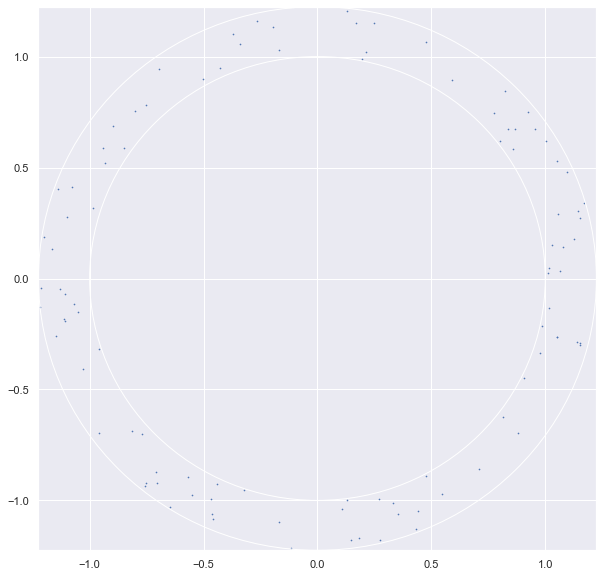

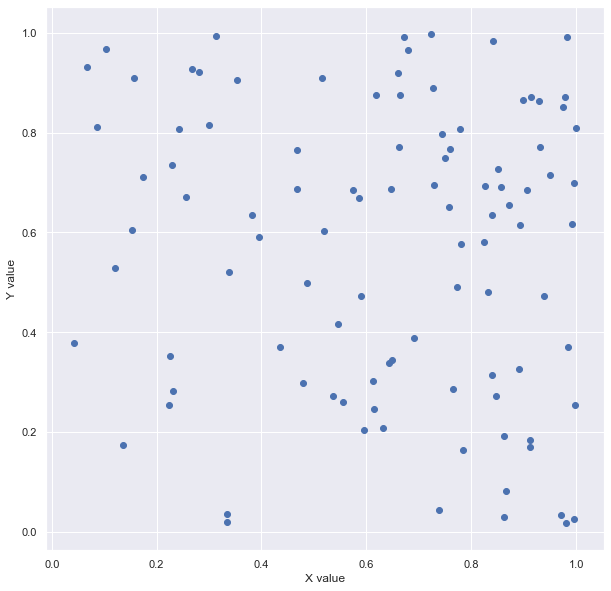

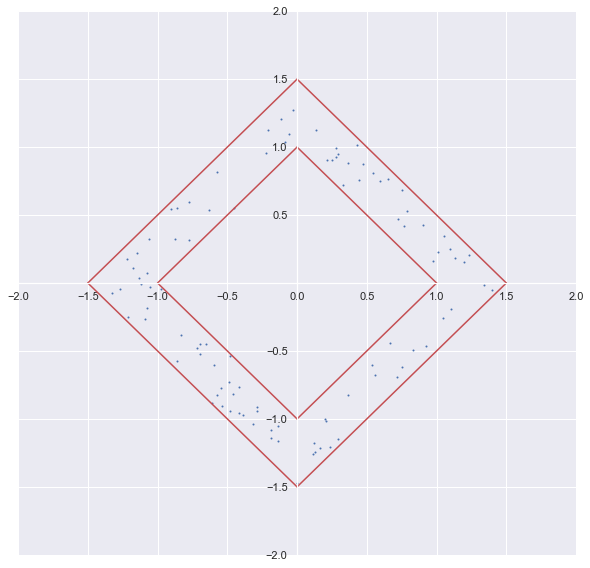

,Kendall,Spearman,Pearson
Distrib,,,
"$(x, y) : 1 <= x^2 + y^2 <= 1.5$",0.811688,0.585389,0.438608
"$C(x + y) * I(x, y \in [0, 1])$",0.291767,0.318931,0.292823
"$(x, y) : 1 ≤ |x| + |y| ≤ 1.5$",0.876930,0.198491,0.202834


In [37]:
table(100)

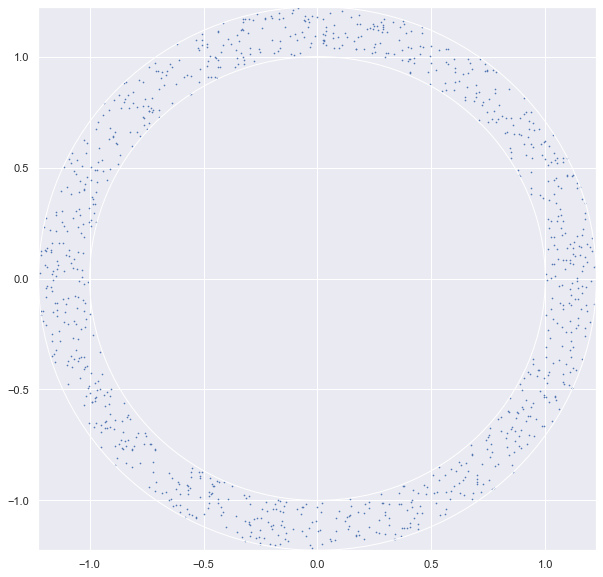

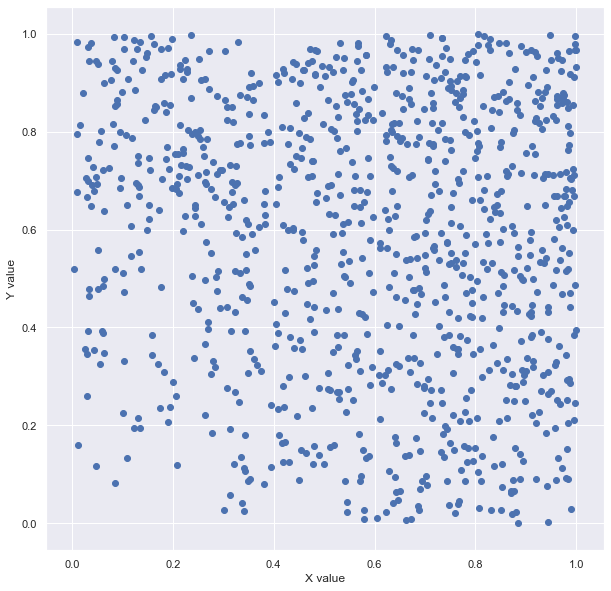

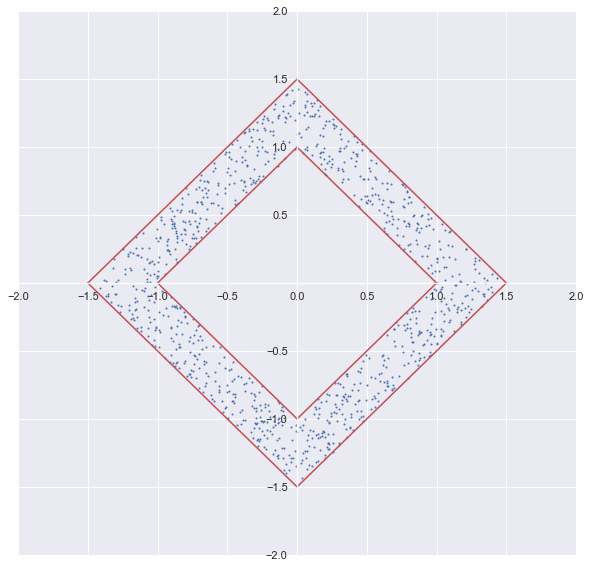

,Kendall,Spearman,Pearson
Distrib,,,
"$(x, y) : 1 <= x^2 + y^2 <= 1.5$",0.883632,0.889424,0.899826
"$C(x + y) * I(x, y \in [0, 1])$",0.001214,0.001243,0.000194
"$(x, y) : 1 ≤ |x| + |y| ≤ 1.5$",0.801796,0.564793,0.585230


In [38]:
table(1000)

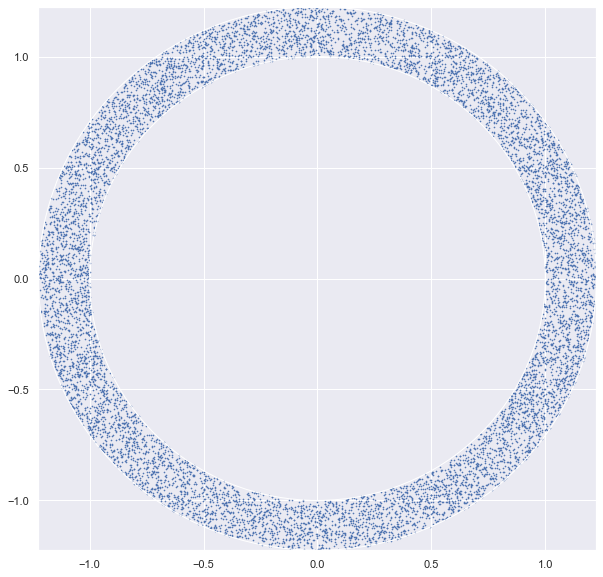

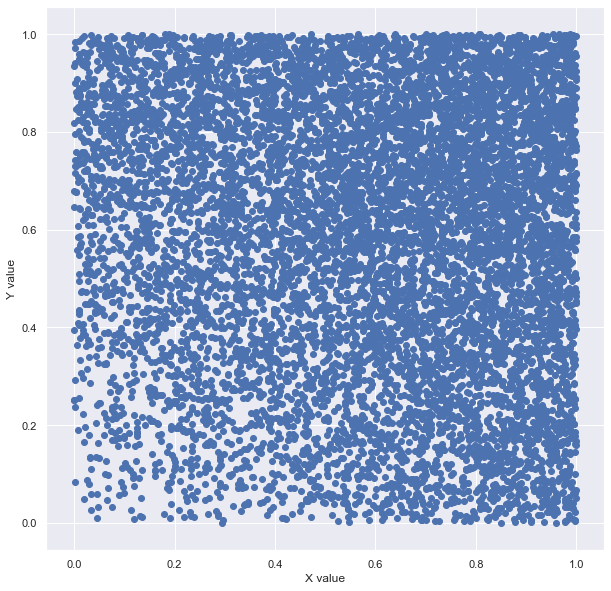

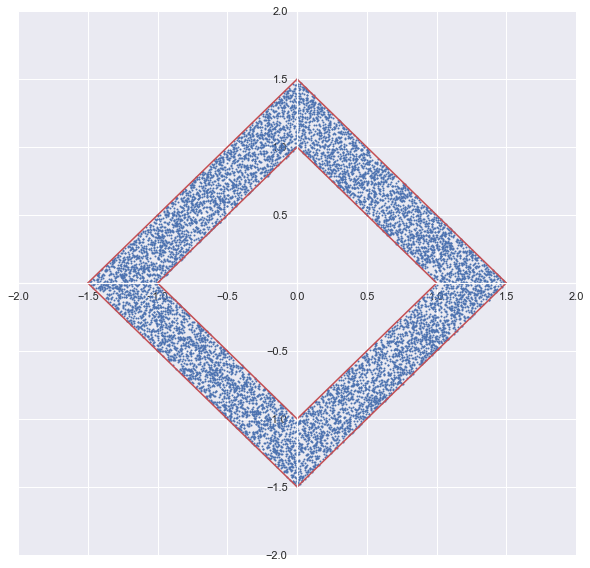

,Kendall,Spearman,Pearson
Distrib,,,
"$(x, y) : 1 <= x^2 + y^2 <= 1.5$",8.611025e-01,8.714528e-01,8.899309e-01
"$C(x + y) * I(x, y \in [0, 1])$",1.451836e-15,1.625484e-15,4.516299e-18
"$(x, y) : 1 ≤ |x| + |y| ≤ 1.5$",9.596393e-01,7.128374e-01,7.311218e-01


In [39]:
table(10000)